#K-최근접 이웃(K-Nearest Neighbor)


K-최근접 이웃(K-Nearest Neighbor)은 새로운 데이터를 입력 받았을 때, 해당 데이터와 가장 가까이에 있는(이웃) k개의 데이터를 확인해 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.

K-최근접 이웃의 경우 회귀와 분류를 모두 지원한다

K-최근접 이웃이 뭔지 예시를 보며 더 자세히 확인해보자

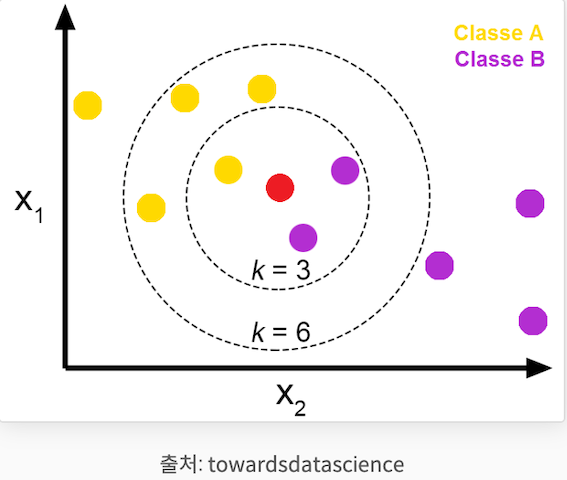

새로운 데이터가 주어졌을 때 (빨간 점) 이를 Class A로 분류할지, Class B로 분류할지 판단하는 문제다. 

해당 데이터와 가장 가까이에 있는(이웃) k개의 데이터를 확인해 주변 데이터가 더 많이 포함돼있는 (클래스)범주로 분류하면 된다

위 예시에서 k=3일때 빨간 점 주변에 Class A (노란색 점) 1개와 Class B (보라색 점) 2개가 있다. 따라서 k=3일때는 해당 데이터가 Class B (보라색 점)으로 분류된다.
 
그럼 k=6일때는? 똑같이 하면 된다 빨간 점 주변에 Class A (노란색 점) 4개와 Class B (보라색 점) 2개가 있으므로 k=6일때는 해당 데이터가 Class A (노란색 점)으로 분류된다.

즉, k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과가 되며 K를 어떻게 정하냐에 따라 결과 값이 바뀔 수 있다. 

K가 너무 작아서도 안 되고, 너무 커서도 안 된다. K의 default 값은 5이고 일반적으로 K는 홀수를 사용해야된다 짝수일 경우 동점이 되어 하나의 결과를 도출할 수 없기 때문이다.(뭐 방법이 없는건 아니겠지만 그래도 웬만하면 홀수를 사용하자^^)

## 예제

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix


### 분류(붓꽃 데이터)

In [ ]:
iris = load_iris()

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9583333333333334
평가 데이터 점수: 1.0


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.325
평가 데이터 점수: 0.36666666666666664


In [ ]:
#검증과정
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00134182, 0.0011723 , 0.00107932, 0.00107574, 0.00098085]),
 'score_time': array([0.00466204, 0.00286984, 0.00285435, 0.00272155, 0.00210881]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors':[3, 5, 7],
               'weights':['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
  estimator=KNeighborsClassifier(),
  param_grid=param_grid,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy
  
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy, Z, **params)

  return out

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:

iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-22.941755,12.112033,0
1,-25.414154,10.763578,0
2,-25.407764,11.932563,0
3,-25.809654,11.482282,0
4,-22.896887,11.954001,0
...,...,...,...
145,6.988862,-9.072500,2
146,9.228084,-6.854784,2
147,7.631304,-8.437013,2
148,6.767282,-10.005542,2


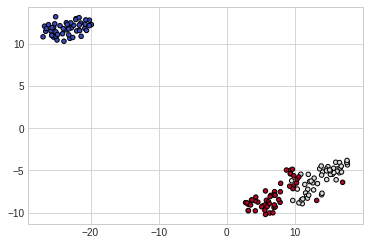

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
preduct = model.predict

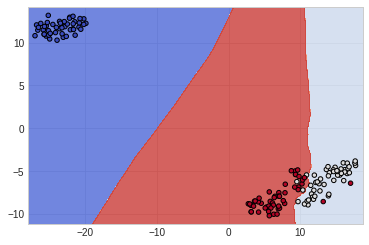

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')